Instruction: https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

# Audio Analysis

In [24]:
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

In [3]:
audio_path = './T08-violin.wav'
x, sr = librosa.load(audio_path)

In [4]:
x

array([-0.00202265, -0.00320533, -0.00137628, ...,  0.00089052,
        0.00087279,  0.0009666 ], dtype=float32)

In [5]:
sr

22050

In [6]:
ipd.Audio(audio_path)

## Waveform

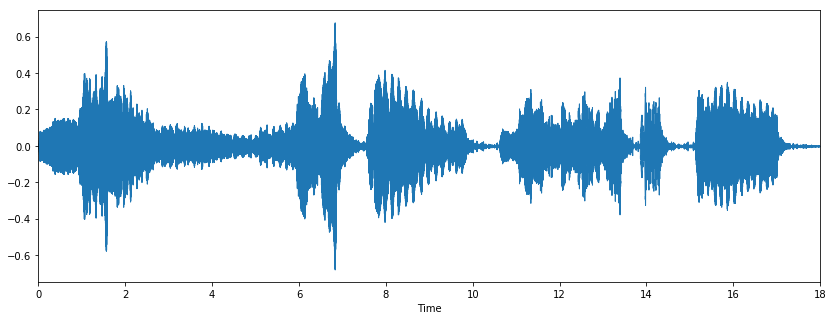

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectrogram
"Spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time."

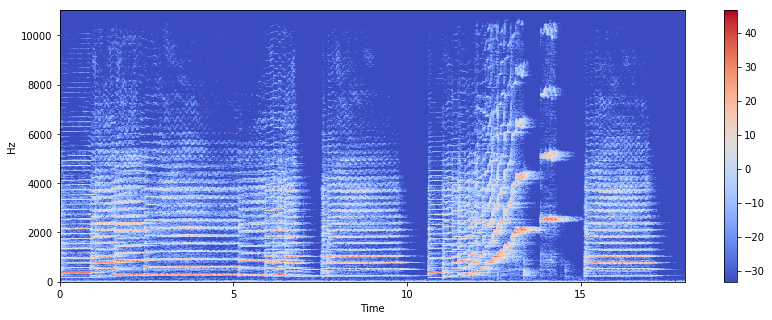

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr,
                        x_axis='time', y_axis='hz')
plt.colorbar()

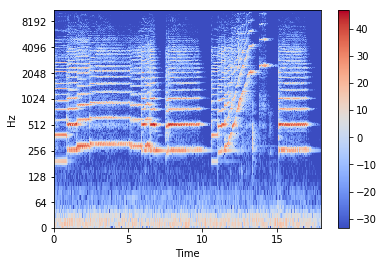

In [9]:
librosa.display.specshow(Xdb, sr=sr,
                        x_axis='time', y_axis='log')
plt.colorbar()

In [10]:
import numpy as np
sr = 22050 # sample rate
T = 5.0 # seconds
t = np.linspace(0, T, int(T*sr),
               endpoint=False) # time variable
x = 0.5*np.sin(5*np.pi*220*t) # pure sine wave at 220 Hz
ipd.Audio(x, rate=sr)


In [11]:
librosa.output.write_wav('tone_220.wav', x, sr)

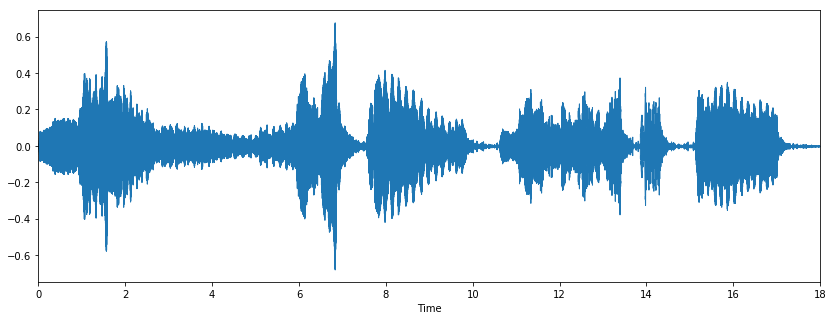

In [12]:
# Load the signal
x, sr = librosa.load('./T08-violin.wav')

# Plot the signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

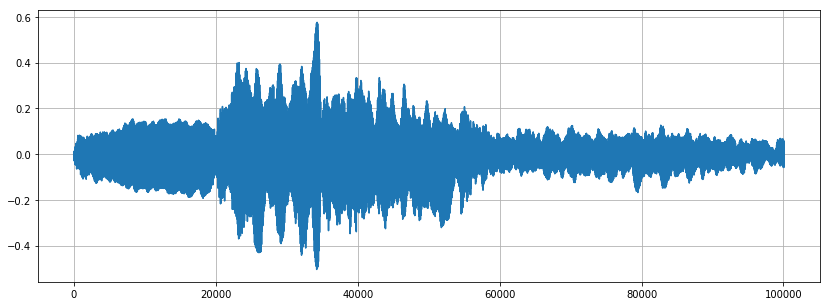

In [13]:
# Zooming in
n0 = 0
n1 = 100100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

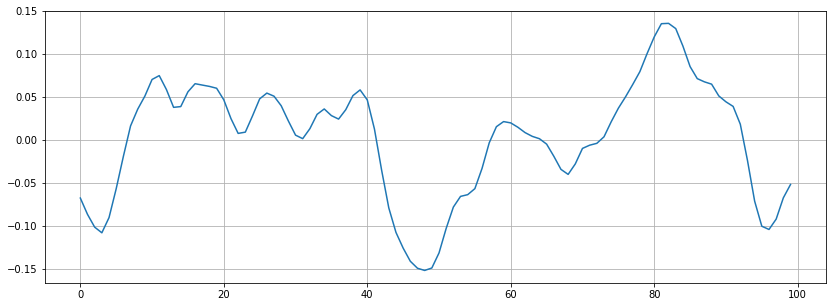

In [14]:
# Zooming in 2
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

Zero crossing rate is the rate of sign-changes along a signal.
There appear to be 6 zero crossings.
It indicates where the "centre of mass" for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


In [18]:
# Computes the spectral centroid for each frame in a signal
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(775,)

In [19]:
# Compute the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [20]:
frames

range(0, 775)

In [21]:
t

array([ 0.        ,  0.02321995,  0.04643991,  0.06965986,  0.09287982,
        0.11609977,  0.13931973,  0.16253968,  0.18575964,  0.20897959,
        0.23219955,  0.2554195 ,  0.27863946,  0.30185941,  0.32507937,
        0.34829932,  0.37151927,  0.39473923,  0.41795918,  0.44117914,
        0.46439909,  0.48761905,  0.510839  ,  0.53405896,  0.55727891,
        0.58049887,  0.60371882,  0.62693878,  0.65015873,  0.67337868,
        0.69659864,  0.71981859,  0.74303855,  0.7662585 ,  0.78947846,
        0.81269841,  0.83591837,  0.85913832,  0.88235828,  0.90557823,
        0.92879819,  0.95201814,  0.9752381 ,  0.99845805,  1.021678  ,
        1.04489796,  1.06811791,  1.09133787,  1.11455782,  1.13777778,
        1.16099773,  1.18421769,  1.20743764,  1.2306576 ,  1.25387755,
        1.27709751,  1.30031746,  1.32353741,  1.34675737,  1.36997732,
        1.39319728,  1.41641723,  1.43963719,  1.46285714,  1.4860771 ,
        1.50929705,  1.53251701,  1.55573696,  1.57895692,  1.60

In [22]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

We see here that there is a rise in the spectral centroid towards the end.

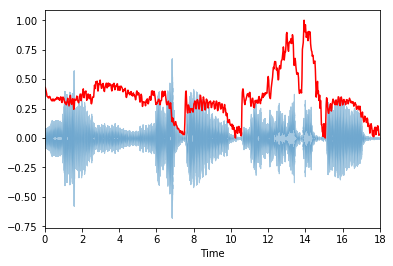

In [26]:
# Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Rolloff
It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy.

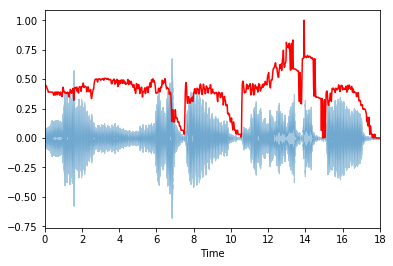

In [27]:
# Compute the rolloff frequency for each frame in a signal
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel-Frequency Cepstral Coefficients
The Mel-Frequency Cepstral Coefficients(MFCCs) are a small set of features (10 to 20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [28]:
x, fs = librosa.load('./simpleLoop.wav')

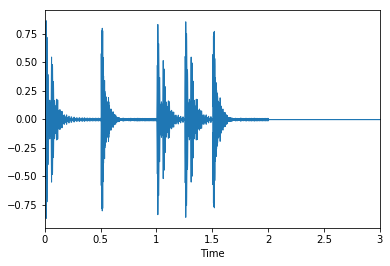

In [31]:
librosa.display.waveplot(x, sr=sr)

In [32]:
# Compute MFCCs across an audio signal
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
# (20, 130) means that mfcc computed 20 MFCCs over 130 frames

(20, 130)


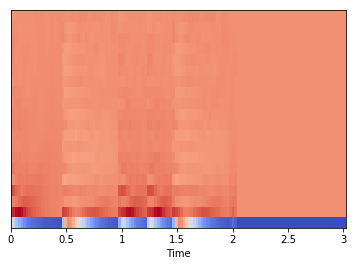

In [33]:
# Display the MFCCs
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Here we perform feature scaling such that each coefficient dimension has zero mean and unit variance.

In [34]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 3.65690384e-15 -1.63971401e-16  3.50147262e-16 -1.21270515e-16
  3.15986553e-17  5.38031158e-17  2.56205313e-17 -9.18069040e-17
 -7.44062931e-17 -1.78489702e-16  1.45610020e-16 -2.54497278e-16
  4.18468679e-17  4.95330273e-17 -1.06752214e-17 -1.09314267e-16
  9.22339128e-17 -3.05738341e-16 -1.05898196e-16 -6.31973106e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


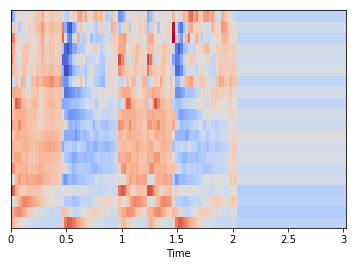

In [35]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chrome Frequencies
A representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

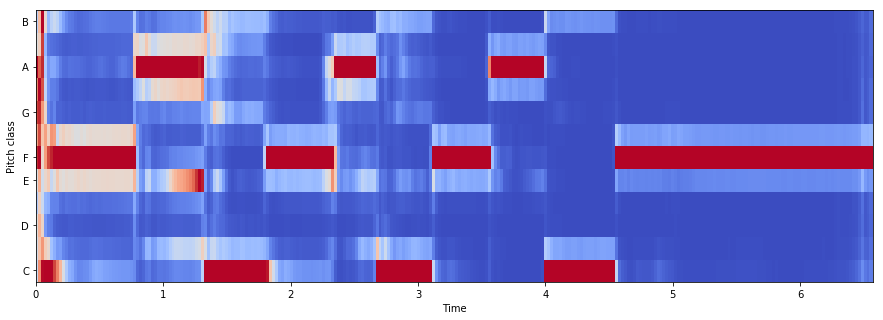

In [40]:
# Compute Chrome Frequencies
x, sr = librosa.load('./T39-piano-8k.wav')

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma',
                        hop_length=hop_length, cmap='coolwarm')

# Classification

Let's model a classifier to classify songs into different genres.

In [54]:
import pandas as pd
from PIL import Image
import pathlib
import csv
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras

import warnings
warnings.filterwarnings('ignore')

In [58]:
# inferno is a type of cmap
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10, 10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'../../DataSet/genres/{g}'):
        songname = f'../../DataSet/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2,
                     Fc=0, noverlap=128,
                     cmap=cmap, sides='default',
                     mode='default', scale='dB')
        plt.axis('off')
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [56]:
os.listdir(f'../../DataSet/genres/{"blues"}')

['blues.00043.au',
 'blues.00012.au',
 'blues.00026.au',
 'blues.00077.au',
 'blues.00084.au',
 'blues.00094.au',
 'blues.00067.au',
 'blues.00036.au',
 'blues.00002.au',
 'blues.00053.au',
 'blues.00073.au',
 'blues.00022.au',
 'blues.00080.au',
 'blues.00016.au',
 'blues.00047.au',
 'blues.00057.au',
 'blues.00006.au',
 'blues.00090.au',
 'blues.00032.au',
 'blues.00063.au',
 'blues.00072.au',
 'blues.00023.au',
 'blues.00081.au',
 'blues.00017.au',
 'blues.00046.au',
 'blues.00056.au',
 'blues.00007.au',
 'blues.00091.au',
 'blues.00033.au',
 'blues.00062.au',
 'blues.00042.au',
 'blues.00013.au',
 'blues.00027.au',
 'blues.00076.au',
 'blues.00085.au',
 'blues.00095.au',
 'blues.00066.au',
 'blues.00037.au',
 'blues.00003.au',
 'blues.00052.au',
 'blues.00049.au',
 'blues.00018.au',
 'blues.00008.au',
 'blues.00059.au',
 'blues.00079.au',
 'blues.00028.au',
 'blues.00038.au',
 'blues.00069.au',
 'blues.00078.au',
 'blues.00029.au',
 'blues.00039.au',
 'blues.00068.au',
 'blues.0004

In [61]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [63]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [68]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'../../DataSet/genres/{g}'):
        songname = f'../../DataSet/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [69]:
data = pd.read_csv('data.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00043.au     0.399025  0.127311        2155.654923   
1  blues.00012.au     0.269320  0.119072        1361.045467   
2  blues.00026.au     0.278484  0.076970        1198.607665   
3  blues.00077.au     0.408876  0.243217        2206.771246   
4  blues.00084.au     0.396258  0.235238        2061.150735   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         2372.403604  5012.019693            0.087165 -109.165355   
1         1567.804596  2739.625101            0.069124 -207.208080   
2         1573.308974  2478.376680            0.051988 -284.819504   
3         2191.473506  4657.388504            0.111526  -29.010990   
4         2085.159448  4221.149475            0.113397  -38.965941   

        mfcc2      mfcc3  ...       mfcc12     mfcc13    mfcc14     mfcc15  \
0  100.621500  -8.614721  ...     6.585774  -8.642621  4.912259 -15.442804   
1  132.799175 -15.438986  ...    -0.613248   0.384877  2.605128  -5.188924   
2  108.785628   9.131956  ...    -3.303735   1.601561  2.660517   3.323455   
3  104.532914 -30.974207  ...    10.786454 -10.558812  6.877709 -10.294858   
4  112.039843 -31.817035  ...    13.327049 -10.921602  9.795615  -5.031277   

     mfcc16     mfcc17    mfcc18    mfcc19    mfcc20  label  
0  1.538750  -6.732474  1.417774 -3.961750  3.287460  blues  
1 -9.527455  -9.244394 -2.848274 -1.418707 -5.932607  blues  
2  3.258920  -4.551106  0.493845  5.937066  3.231544  blues  
3  6.967845 -10.256100  0.705014 -6.000722  1.348955  blues  
4  7.200982  -6.754969  2.663612 -4.380430  0.414055  blues  

[5 rows x 28 columns]

In [70]:
data.shape

(1000, 28)

In [71]:
data = data.drop(['filename'], axis=1)

In [72]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [99]:
X

array([[ 0.24927244, -0.05510822, -0.06453199, ...,  0.23543715,
        -0.43503024,  1.14252973],
       [-1.33899259, -0.18060128, -1.17493699, ..., -0.86771223,
         0.24244699, -1.26125761],
       [-1.22677249, -0.82187606, -1.4019312 , ..., -0.00347996,
         2.20205489,  1.12795173],
       ...,
       [-0.43247942, -0.39130705, -0.82665374, ..., -0.46846715,
        -1.46553742, -0.79732759],
       [-0.19983702, -0.71651358, -1.12235633, ...,  0.2717664 ,
        -0.72311185, -0.64936228],
       [ 0.36431828, -0.63060737,  0.54398509, ...,  1.024048  ,
         0.68433009,  0.3995702 ]])

In [73]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
len(y_train)

800

In [80]:
len(y_test)

200

In [81]:
X_train[10]

array([-0.77110767, -0.74319454, -1.48574218, -1.48373836, -1.55928144,
       -1.25982201, -1.11354771,  2.02932519, -0.64352134, -0.56214193,
        1.34611645, -1.53242127,  0.94126888, -1.04288385, -0.29721416,
       -0.7520313 ,  0.23519771, -1.20746097,  0.08910233, -1.97514297,
        0.30672396, -1.37536825, -1.58219583, -0.75564906,  0.47580284,
       -0.96136556])

In [101]:
X_train.shape

(800, 26)

In [83]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [85]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [86]:
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
800/800 [==============================] - 1s 698us/step - loss: 2.1439 - acc: 0.2700
Epoch 2/20
800/800 [==============================] - 0s 30us/step - loss: 1.8299 - acc: 0.3675
Epoch 3/20
800/800 [==============================] - 0s 36us/step - loss: 1.5956 - acc: 0.4100
Epoch 4/20
800/800 [==============================] - 0s 34us/step - loss: 1.4101 - acc: 0.4962
Epoch 5/20
800/800 [==============================] - 0s 33us/step - loss: 1.2705 - acc: 0.5787
Epoch 6/20
800/800 [==============================] - 0s 36us/step - loss: 1.1642 - acc: 0.6262
Epoch 7/20
800/800 [==============================] - 0s 32us/step - loss: 1.0657 - acc: 0.6687
Epoch 8/20
800/800 [==============================] - 0s 32us/step - loss: 0.9943 - acc: 0.6800
Epoch 9/20
800/800 [==============================] - 0s 39us/step - loss: 0.9295 - acc: 0.7037
Epoch 10/20
800/800 [==============================] - 0s 40us/step - loss: 0.8785 - ac

In [87]:
test_loss, test_acc = model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 367us/step


In [102]:
test_loss

1.0247008275985718

In [88]:
print('test_acc: ', test_acc)

test_acc:  0.655


In [89]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [108]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=400,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/400
600/600 [==============================] - 1s 1ms/step - loss: 2.2946 - acc: 0.1267 - val_loss: 2.1742 - val_acc: 0.3400
Epoch 2/400
600/600 [==============================] - 0s 57us/step - loss: 2.1213 - acc: 0.3650 - val_loss: 2.0289 - val_acc: 0.3150
Epoch 3/400
600/600 [==============================] - 0s 69us/step - loss: 1.9568 - acc: 0.3633 - val_loss: 1.9051 - val_acc: 0.3050
Epoch 4/400
600/600 [==============================] - 0s 68us/step - loss: 1.8113 - acc: 0.3633 - val_loss: 1.8029 - val_acc: 0.3200
Epoch 5/400
600/600 [==============================] - 0s 76us/step - loss: 1.6940 - acc: 0.3767 - val_loss: 1.7008 - val_acc: 0.3400
Epoch 6/400
600/600 [==============================] - 0s 75us/step - loss: 1.5920 - acc: 0.4233 - val_loss: 1.6221 - val_acc: 0.3900
Epoch 7/400
600/600 [==============================] - 0s 70us/step - loss: 1.5010 - acc: 0.4983 - val_loss: 1.5658 - val_acc: 0.4550
Epoch 8/400
600/6

600/600 [==============================] - 0s 62us/step - loss: 0.0143 - acc: 0.9983 - val_loss: 1.5534 - val_acc: 0.6700
Epoch 122/400
600/600 [==============================] - 0s 65us/step - loss: 0.0152 - acc: 0.9983 - val_loss: 1.5410 - val_acc: 0.6850
Epoch 123/400
600/600 [==============================] - 0s 63us/step - loss: 0.0139 - acc: 0.9983 - val_loss: 1.5310 - val_acc: 0.6850
Epoch 124/400
600/600 [==============================] - 0s 62us/step - loss: 0.0132 - acc: 0.9967 - val_loss: 1.5340 - val_acc: 0.6900
Epoch 125/400
600/600 [==============================] - 0s 58us/step - loss: 0.0119 - acc: 0.9983 - val_loss: 1.5530 - val_acc: 0.6900
Epoch 126/400
600/600 [==============================] - 0s 59us/step - loss: 0.0134 - acc: 0.9983 - val_loss: 1.5673 - val_acc: 0.6800
Epoch 127/400
600/600 [==============================] - 0s 61us/step - loss: 0.0141 - acc: 0.9983 - val_loss: 1.5653 - val_acc: 0.6850
Epoch 128/400
600/600 [==============================] - 0s 61

600/600 [==============================] - 0s 65us/step - loss: 0.0118 - acc: 0.9983 - val_loss: 1.8348 - val_acc: 0.6800
Epoch 242/400
600/600 [==============================] - 0s 65us/step - loss: 0.0077 - acc: 0.9983 - val_loss: 1.8772 - val_acc: 0.6800
Epoch 243/400
600/600 [==============================] - 0s 55us/step - loss: 0.0046 - acc: 0.9983 - val_loss: 1.9195 - val_acc: 0.6850
Epoch 244/400
600/600 [==============================] - 0s 62us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 1.9305 - val_acc: 0.6750
Epoch 245/400
600/600 [==============================] - 0s 62us/step - loss: 0.0072 - acc: 0.9983 - val_loss: 1.9079 - val_acc: 0.6800
Epoch 246/400
600/600 [==============================] - 0s 65us/step - loss: 0.0062 - acc: 0.9983 - val_loss: 1.8731 - val_acc: 0.6800
Epoch 247/400
600/600 [==============================] - 0s 61us/step - loss: 0.0044 - acc: 0.9983 - val_loss: 1.8469 - val_acc: 0.6900
Epoch 248/400
600/600 [==============================] - 0s 61

600/600 [==============================] - 0s 59us/step - loss: 0.0032 - acc: 0.9983 - val_loss: 1.9722 - val_acc: 0.6900
Epoch 362/400
600/600 [==============================] - 0s 57us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 1.9712 - val_acc: 0.6750
Epoch 363/400
600/600 [==============================] - 0s 60us/step - loss: 0.0072 - acc: 0.9983 - val_loss: 1.9701 - val_acc: 0.6750
Epoch 364/400
600/600 [==============================] - 0s 69us/step - loss: 0.0071 - acc: 0.9983 - val_loss: 1.9705 - val_acc: 0.6850
Epoch 365/400
600/600 [==============================] - 0s 74us/step - loss: 0.0056 - acc: 0.9983 - val_loss: 1.9776 - val_acc: 0.6900
Epoch 366/400
600/600 [==============================] - 0s 72us/step - loss: 0.0037 - acc: 0.9983 - val_loss: 1.9934 - val_acc: 0.6900
Epoch 367/400
600/600 [==============================] - 0s 68us/step - loss: 0.0027 - acc: 0.9983 - val_loss: 2.0144 - val_acc: 0.6700
Epoch 368/400
600/600 [==============================] - 0s 75

In [105]:
results

[1.6684677028656005, 0.64]

In [109]:
results

[2.6169327163696288, 0.64]

In [110]:
predictions = model.predict(X_test)

In [111]:
predictions[0].shape

(10,)

In [112]:
np.sum(predictions[0])

0.99999994

In [113]:
np.argmax(predictions[0])

5